<center> <h1> Digging into Airbnb NYC data. </h1>
<h3> Nordin Shafiq, IEEE CSC. </h3>
<h5> Task 2 - Data Science Committee </h5> </center>

In [1]:
%%HTML
<div class='tableauPlaceholder' id='viz1658347811622' style='position: relative'><noscript><a href='#'><img alt='Dashboard 1 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ai&#47;AirbnbTask&#47;Dashboard1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='path' value='views&#47;AirbnbTask&#47;Dashboard1?:language=en-US&amp;:embed=true' /> <param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ai&#47;AirbnbTask&#47;Dashboard1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1658347811622');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='1000px';vizElement.style.height='827px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='1000px';vizElement.style.height='827px';} else { vizElement.style.width='100%';vizElement.style.height='1227px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

The previous <a href="https://public.tableau.com/views/AirbnbTask/Dashboard1?:language=en-US&:display_count=n&:origin=viz_share_link">Dashboard</a> shows us several things.

On mapping it out we can see:
 * How is the average price ranging over NYC
 * How review scores rating is handy in choosing a well-rated place that is fair price-wise
 
How hot!
 * How price is related also to the type of room, for example, an entire apartment is way more hot than a private room, and it's logically straightforward, but the size of the circles discribes how much ratings this type of property get, knowing that, we may trust the ratings of the bigger circles more.
 
Like the job?
 * Here we can see how hot (pricy) are properties according to their owners' starting-job-quarter-of-a-year
 * Also how consistent are the averages of ratings and how it relates to older owners (or the pricy ones).
 
 
Provided the quick insights from above we may continue to explore the data, prepare it for machine learning purposes.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
df = pd.read_excel('airbnb.xlsx')

In [3]:
df.columns = df.columns.to_series().apply(lambda x: x.strip())

In [4]:
df.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaT,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaT,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaT,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,2008-06-26,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,2008-06-26,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [5]:
df[['Beds', 'Number of Records', 'Number Of Reviews', 'Price', 'Review Scores Rating']].describe()

,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
count,30393.000000,30478.0,30478.000000,30478.000000,22155.000000
mean,1.530089,1.0,12.018735,163.589737,91.993230
std,1.015359,0.0,21.980703,197.785454,8.850373
min,0.000000,1.0,0.000000,10.000000,20.000000
25%,1.000000,1.0,0.000000,80.000000,89.000000
50%,1.000000,1.0,3.000000,125.000000,94.000000
75%,2.000000,1.0,13.000000,195.000000,100.000000
max,16.000000,1.0,257.000000,10000.000000,100.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30478 entries, 0 to 30477
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Host Id                     30478 non-null  int64         
 1   Host Since                  30475 non-null  datetime64[ns]
 2   Name                        30478 non-null  object        
 3   Neighbourhood               30478 non-null  object        
 4   Property Type               30475 non-null  object        
 5   Review Scores Rating (bin)  22155 non-null  float64       
 6   Room Type                   30478 non-null  object        
 7   Zipcode                     30344 non-null  float64       
 8   Beds                        30393 non-null  float64       
 9   Number of Records           30478 non-null  int64         
 10  Number Of Reviews           30478 non-null  int64         
 11  Price                       30478 non-null  int64     

Eyeballing the data, we see some interesting scenarios in which it can be useful. For instance, we may try to predict the rating using neighbourhood, room type, and price.

In [7]:
#Let's subset our data
df = df[['Neighbourhood', 'Room Type', 'Price', 'Review Scores Rating']]
#We'll drop all null values as 'Review Scores Rating' is the target variable
df.dropna(inplace = True)

In [8]:
df.describe()

,Price,Review Scores Rating
count,22155.000000,22155.000000
mean,154.787633,91.993230
std,148.836621,8.850373
min,10.000000,20.000000
25%,85.000000,89.000000
50%,125.000000,94.000000
75%,190.000000,100.000000
max,10000.000000,100.000000


In [9]:
data = pd.get_dummies(df)
data.describe().T[['mean', 'std', 'min', 'max']]

,mean,std,min,max
Price,154.787633,148.836621,10.0,10000.0
Review Scores Rating,91.993230,8.850373,20.0,100.0
Neighbourhood_Bronx,0.009795,0.098484,0.0,1.0
Neighbourhood_Brooklyn,0.383074,0.486147,0.0,1.0
Neighbourhood_Manhattan,0.531031,0.499047,0.0,1.0
Neighbourhood_Queens,0.071767,0.258108,0.0,1.0
Neighbourhood_Staten Island,0.004333,0.065685,0.0,1.0
Room Type_Entire home/apt,0.581539,0.493318,0.0,1.0
Room Type_Private room,0.393997,0.488645,0.0,1.0
Room Type_Shared room,0.024464,0.154488,0.0,1.0


The table above shows calculations on the dummies, each sub-variable mean is it's probability in the dataset. For example, from rows 3 to 7 (Neighbourhood sub-variables), the sum of their means values is = 1, then each mean value is it's variable's presence in the dataset, hence the probability.
So, we can see that most of these observations (53.1% of the cleaned-no-null data) were made to Manhattan. Also, most of rooms were 'Entire home/apt' (58.15% of the cleaned-no-null data), supporting the tableau dashboard previously presented.

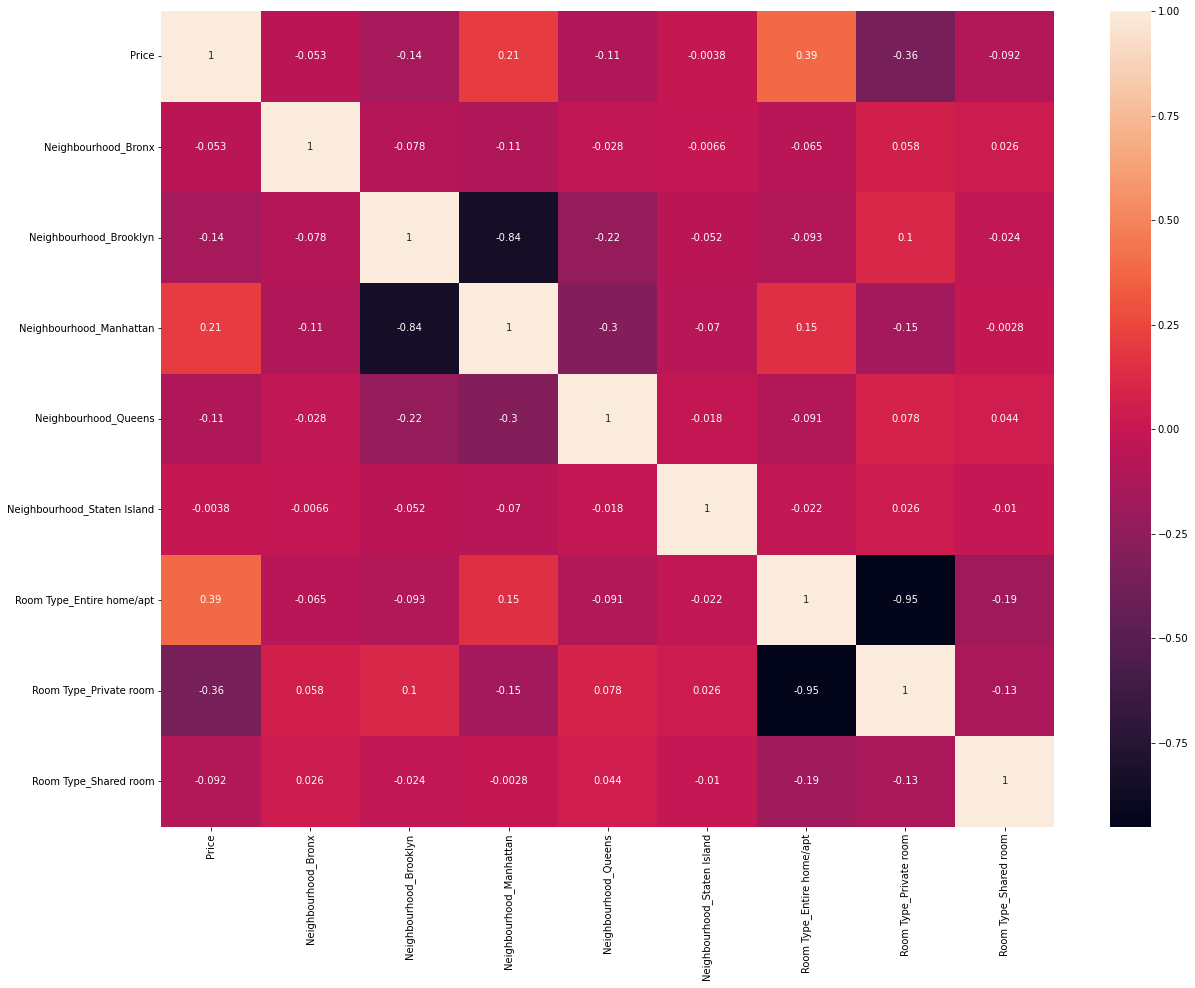

In [10]:
from sklearn import linear_model; from sklearn.model_selection import train_test_split
y = data.pop('Review Scores Rating')

#Create a heatmap for df
fig = plt.figure(figsize = (20,15))
ax = fig.gca()
c = data.corr()
sns.heatmap(c, annot = True, ax = ax);

Based on the above figure, I guess it's right to choose them for regresison.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=42)
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
reg.coef_

array([ 0.00233493,  0.50659901,  0.71445057, -0.13875235,  0.04703767,
       -1.12933491,  0.90904099, -0.25312487, -0.65591611])

Now, for example, let's see how likely it is that people like a private room that is in the bronx at 120$.

In [12]:
print("Its predicted score is {:.3}%".format(float(reg.predict([[120, 1, 0, 0, 0, 0, 0, 1, 0]])))) #the input is translated in the dummy form

Its predicted score is 91.5%


What if the same features but in less price? say a 60$.

In [13]:
print("Its predicted score is {:.3}%".format(float(reg.predict([[60, 1, 0, 0, 0, 0, 0, 1, 0]])))) #the input is translated in the dummy form

Its predicted score is 91.4%


Pretty weird, what about a 1000$!

In [14]:
print("Its predicted score is {:.3}%".format(float(reg.predict([[1000, 1, 0, 0, 0, 0, 0, 1, 0]])))) #the input is translated in the dummy form

Its predicted score is 93.6%



<center><h1></h1><img src="https://pbs.twimg.com/media/CbSNFhRUcAAwVcw.jpg" alt="لم تظبط معنا" width="289" height="382" style="border:2px solid black"></center>

In [15]:
from sklearn.metrics import mean_absolute_error
print("Training error : {:.2f}%".format(mean_absolute_error(y_train, reg.predict(X_train))))
print("Training error : {:.2f}%".format(mean_absolute_error(y_test, reg.predict(X_test))))


Training error : 6.24%
Training error : 6.24%


The above analysis is based on NYC airbnb data, thus applies only on the same conditions, it may be biased, knowing that the majority of the analysis was on the Room Type: Entire home/apt and the Neighbourhood: Manhattan with about 25% of it dropped as nulls. The regression model achieves a mere
93-ish% accuracy based only on specific features that may get overruled by other place-wise feature. This notebook is only for educational purposes.